In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Plotting params

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 7,                    # Base font size
    "axes.labelsize": 7,              # Axis label font size
    "axes.labelweight": "bold",         # Bold axis labels
    "font.weight": "bold",          # Bold font for all text
    "axes.titlesize": 7,              # Axis title (not fig title)
    "xtick.labelsize": 5.5,
    "ytick.labelsize": 5.5,
    "legend.fontsize": 7,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (3.25,2.6),     # For 0.5\textwidth plot
    # "figure.constrained_layout.use": True,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.0,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in", 
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 1.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})


folder_name_png = 'PLOTS_BANDITS_PNG'
folder_name_svg = 'PLOTS_BANDITS_SVG'
save_fig = True
alpha = 1

# Normal Vs PD plotting

In [3]:
# reading pickle file
with open(r'DATA\non_stationary_bandits_normal.pkl', 'rb') as f:
    data_normal = pickle.load(f)

with open(r'DATA\non_stationary_bandits_pd.pkl', 'rb') as f:
    data_pd = pickle.load(f)


In [4]:
bin_change = 75

# normal data
accuracy_percentages_normal = data_normal['accuracy']
avg_accuracy_per_bin_normal = np.mean(accuracy_percentages_normal, axis=0)
epsilon_monitor_normal = data_normal['epsilon_monitor'][0]
arm_chosen_monitor_normal = data_normal['arm_chosen_monitor'][0]


accuracy_percentages_pd = data_pd['accuracy']
avg_accuracy_per_bin_pd = np.mean(accuracy_percentages_pd, axis=0)
epsilon_monitor_pd = data_pd['epsilon_monitor'][18]
arm_chosen_monitor_pd = data_pd['arm_chosen_monitor'][1]
bins = np.arange(1, 16)

In [5]:
avg_accuracy_per_bin_normal[0:7], avg_accuracy_per_bin_normal[7:15]

(array([80. , 88. , 85.5, 76. , 75.5, 78. , 85.5], dtype=float32),
 array([47.5, 53. , 61.5, 45.5, 64.5, 60.5, 63. , 82.5], dtype=float32))

In [6]:
avg_accuracy_per_bin_pd[0:7], avg_accuracy_per_bin_pd[7:15]

(array([82. , 81.5, 71.5, 66.5, 60. , 57. , 55. ], dtype=float32),
 array([25.5,  5.5,  3.5,  0. ,  2.5,  5. ,  9. , 10. ], dtype=float32))

## DBS data

In [7]:
# Reading pickle file
with open(r'DATA\non_stationary_bandits_DBS.pkl', 'rb') as f:
    data_dbs = pickle.load(f)
cases = list(data_dbs.keys())
del_lim = list(data_dbs['PD'].keys())


last_bin_accuracies_dict = {case: [] for case in cases}
for case in cases:
    accuracy_mon = []
    for delta in del_lim:
        accuracies_avg = data_dbs[case][delta].mean(axis=0) #(20, 15)
        accuracies_avg_last_bin = accuracies_avg[-1]
        accuracy_mon.append(accuracies_avg_last_bin)
    last_bin_accuracies_dict[case] = accuracy_mon


del_lim_values_PD = list(data_dbs['PD'].keys())
bandit_scores_pd = last_bin_accuracies_dict['PD']
bandit_scores_pd = [v if v != 0 else 1.25 for v in bandit_scores_pd]

del_lim_values_std_DBS = list(data_dbs['std DBS'].keys())
bandit_scores_std_DBS = last_bin_accuracies_dict['std DBS']
bandit_scores_std_DBS = [v if v != 0 else 1 for v in bandit_scores_std_DBS]

del_lim_values_open_loop_low_amp = list(data_dbs['Open loop low amp'].keys())
bandit_scores_open_loop_low_amp = last_bin_accuracies_dict['Open loop low amp']
bandit_scores_open_loop_low_amp = [v if v != 0 else 1.5 for v in bandit_scores_open_loop_low_amp]

del_lim_values_open_loop_high_amp = list(data_dbs['Open loop high amp'].keys())
bandit_scores_open_loop_high_amp = last_bin_accuracies_dict['Open loop high amp']

del_lim_values_closed_loop = list(data_dbs['closed loop'].keys())
bandit_scores_closed_loop = last_bin_accuracies_dict['closed loop']

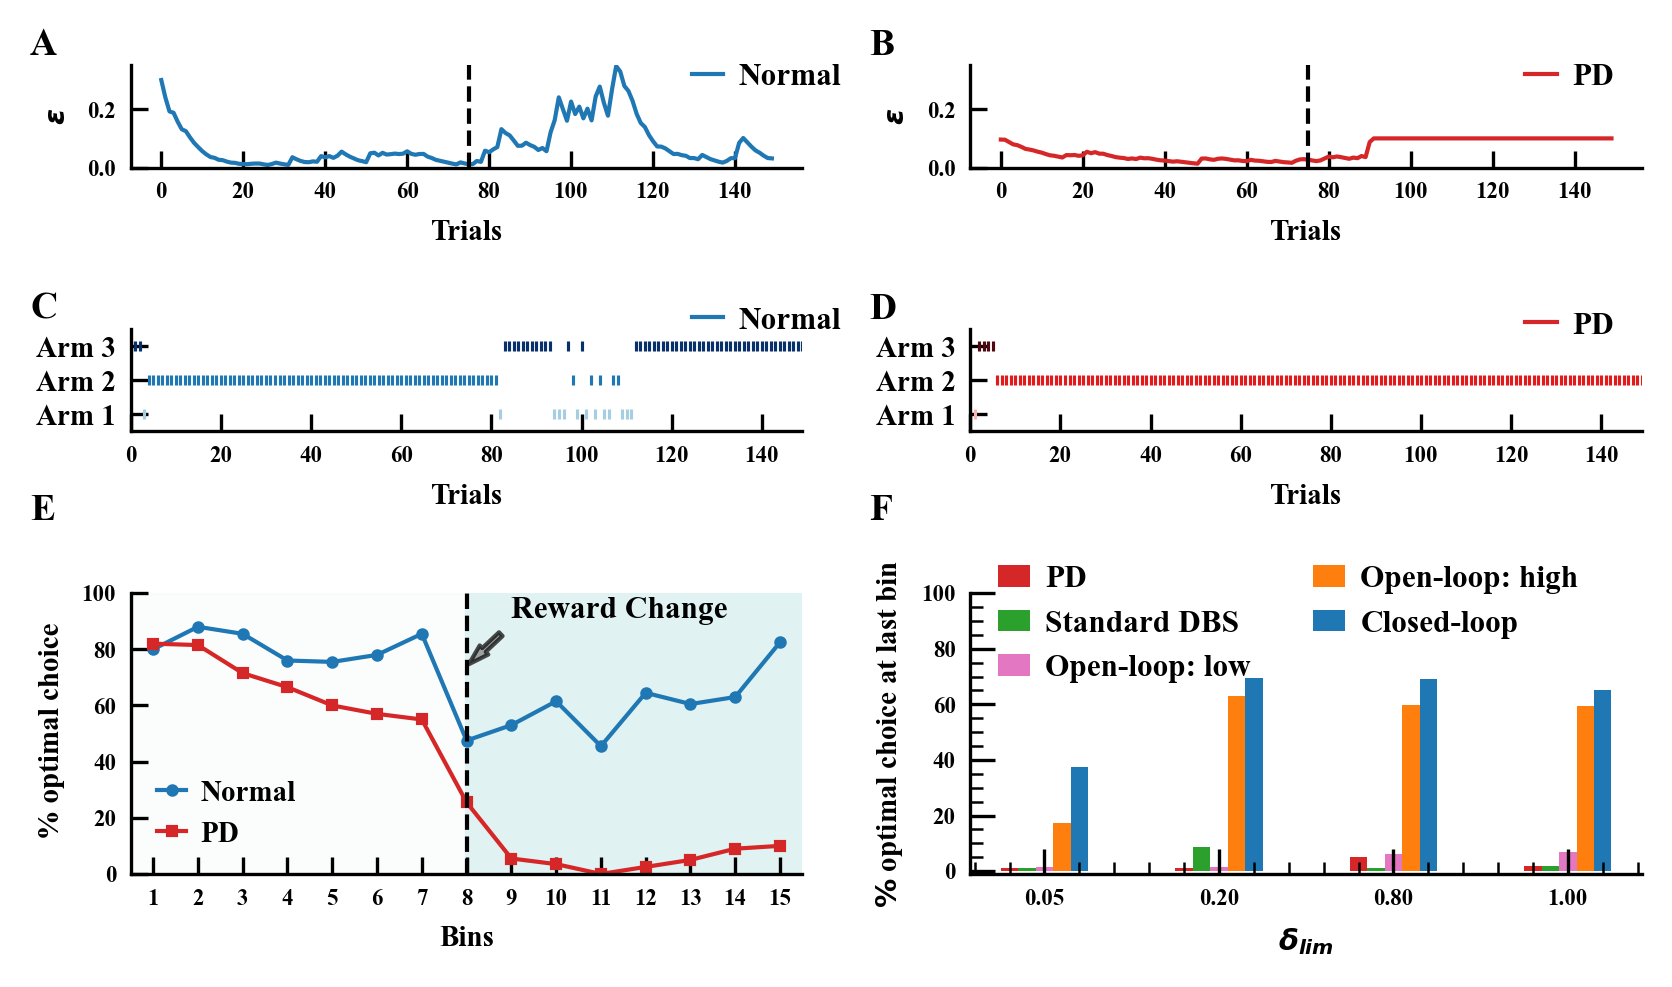

In [23]:
fig = plt.figure(figsize=(6.5, 3.5), constrained_layout=False)
gs = fig.add_gridspec(3, 2, height_ratios=[0.4, 0.4, 1.1])  # Increase first row height

# --- Row 1: Full-width plot for avg_accuracy ---
ax1 = fig.add_subplot(gs[2, 0])
ax1.plot(bins, avg_accuracy_per_bin_normal, marker='o', color= 'tab:blue', label='Normal', markersize = 2)
ax1.plot(bins, avg_accuracy_per_bin_pd, marker='s', color='tab:red', label='PD', markersize = 2)
ax1.axvline(x=8, color='black', linestyle='--', linewidth=1)
# Arrow and annotation for bin change
arrow_y = ax1.get_ylim()[1]*0.8
ax1.annotate(
    'Reward Change',
    xy=(8, arrow_y), xytext=(9, arrow_y+15),
    arrowprops=dict(facecolor='gray', shrink=0.05, width=1.25, headwidth=3, headlength=5, linestyle='-', alpha=0.7),
    fontsize=7.5, color='black', fontweight='bold', va='bottom'
)
ax1.legend(frameon=False, loc='lower left')
ax1.axvspan(0.5, 8, color="#e0f2f1", alpha=0.1)
ax1.axvspan(8, 15.5, color="#e0f2f1", alpha=1)
ax1.set_xlabel('Bins', fontsize = 7)
ax1.set_ylim(0, 100)
ax1.set_ylabel(' % optimal choice', fontsize = 7)
ax1.set_xticks(bins)
ax1.set_xlim(0.5, 15.5)

# --- Row 2: Epsilon plots side by side ---
ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(epsilon_monitor_normal, color='tab:blue', label='Normal')
ax2.axvline(x=75, color='black', linestyle='--', linewidth=1)
ax2.set_ylim(0, 0.35)
ax2.set_xlabel('Trials', fontsize = 7)
ax2.set_ylabel('$\epsilon$', fontsize = 7)
ax2.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.1, 1.3), fontsize = 7.5)
ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(epsilon_monitor_pd, color='tab:red', label='PD')
ax3.axvline(x=75, color='black', linestyle='--', linewidth=1)
ax3.set_ylim(0, 0.35)
ax3.set_xlabel('Trials', fontsize = 7)
ax3.set_ylabel('$\epsilon$', fontsize = 7)
ax3.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.0, 1.3), fontsize = 7.5)

# --- Row 3: Event plots side by side ---
normal_colors = ['#a6cee3', '#1f78b4', '#08306b']  # light, medium, dark blue

# For PD: light to dark red
pd_colors = ['#fbb4ae', '#e31a1c', "#4F0711"]      # light, medium, dark red

ax4 = fig.add_subplot(gs[1, 0])
for arm, color in zip(range(3), normal_colors):
    trials = np.where(arm_chosen_monitor_normal == arm)[0]
    ax4.eventplot(trials, lineoffsets=arm, colors=color, linelengths=0.3, linewidths=0.75)
ax4.set_yticks([0, 1, 2])
ax4.set_yticklabels(['Arm 1', 'Arm 2', 'Arm 3'], fontsize = 7)
ax4.set_xlabel('Trials', fontsize = 7)
ax4.set_xlim(0, len(arm_chosen_monitor_normal)-1)
ax4.set_ylim(-0.5, 2.5)
legend_handles = [
    Line2D([0], [0], color='tab:blue', lw=1, label='Normal')
]
# Place the legend above the subplots (adjust loc and bbox_to_anchor as needed)
ax4.legend(handles=legend_handles, frameon=False, loc = 'upper right', bbox_to_anchor=(1.1, 1.5), fontsize = 7.5)

ax5 = fig.add_subplot(gs[1, 1])
for arm, color in zip(range(3), pd_colors):
    trials = np.where(arm_chosen_monitor_pd == arm)[0]
    ax5.eventplot(trials, lineoffsets=arm, colors=color, linelengths=0.3, linewidths=0.75)
ax5.set_yticks([0, 1, 2])
ax5.set_yticklabels(['Arm 1', 'Arm 2', 'Arm 3'], fontsize = 7)
ax5.set_xlabel('Trials', fontsize = 7)
ax5.set_xlim(0, len(arm_chosen_monitor_pd)-1)
ax5.set_ylim(-0.5, 2.5)
legend_handles = [
    Line2D([0], [0], color='tab:red', lw=1, label='PD')
]
# Place the legend above the subplots (adjust loc and bbox_to_anchor as needed)
ax5.legend(handles=legend_handles, frameon=False, loc = 'upper right', bbox_to_anchor=(1.0, 1.45), fontsize = 7.5)


bar_width = 0.1
x_values = np.arange(len(del_lim_values_PD))  

# Plot each dataset with an offset for side-by-side bars and error bars
ax6 = fig.add_subplot(gs[2, 1])
ax6.bar(x_values - bar_width * 2, bandit_scores_pd, width=bar_width, label="PD", alpha=alpha, color='#d62728', capsize=4)
ax6.bar(x_values - bar_width, bandit_scores_std_DBS, width=bar_width, label="Standard DBS", alpha=alpha, color='#2ca02c', capsize=4)
ax6.bar(x_values, bandit_scores_open_loop_low_amp, width=bar_width, label="Open-loop: low", alpha=alpha, color='#e377c2', capsize=4)
ax6.bar(x_values + bar_width, bandit_scores_open_loop_high_amp, width=bar_width, label="Open-loop: high", alpha=alpha, color='#ff7f0e', capsize=4)
ax6.bar(x_values + bar_width * 2, bandit_scores_closed_loop, width=bar_width, label="Closed-loop", alpha=alpha, color='#1f77b4', capsize=4)

ax6.set_xlabel(r"$\delta_{lim}$", fontsize = 7)
ax6.set_ylabel("$\%$ optimal choice at last bin", fontsize = 7)
ax6.set_ylim(-1,100)
ax6.legend(loc="upper left", frameon=False, bbox_to_anchor=(0, 1.2), fontsize = 7.5, ncol = 2)
ax6.set_xticks(x_values, [f"{v:.2f}" for v in del_lim_values_PD], rotation=0)
ax6.minorticks_on()
ax6.tick_params(axis='both', which='major', length=6)
ax6.tick_params(axis='both', which='minor', length=3)
axes = [ax2, ax3, ax4, ax5, ax1, ax6]
labels = ['A', 'B', 'C', 'D', 'E', 'F']

# x positions for left and right columns
x_positions = [-0.15, -0.075, -0.15, -0.075, -0.15, -0.075]

for ax, label, xpos in zip(axes, labels, x_positions):
    ax.text(-0.15, 1.35, label, transform=ax.transAxes, fontsize=9, fontweight='bold', va='top', ha='left')


# if save_fig:
#     plt.savefig(f'{folder_name_png}/non_stationary_bandits_normal_pd.png', dpi=300, bbox_inches='tight')
#     plt.savefig(f'{folder_name_svg}/non_stationary_bandits_normal_pd.svg', dpi=300, bbox_inches='tight')
# plt.show()
fig.subplots_adjust(hspace=1, wspace = 0.25) 
# plt.savefig('Bandits_all.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('Bandits_all.svg', format='svg', bbox_inches='tight')
plt.savefig('Bandits_all_new.png', format='png', bbox_inches='tight')
# plt.savefig('Bandits_all.eps', format='eps', bbox_inches='tight')